TO DO:
- Consider geospatial uses of data
- Compare USFWS birds df top 10 with outside USFWS birds df top 10
    - find out if there is a way to do an intersect (like in SQL)
- Create subsets of uncommon birds (lowest 10?) in both USFWS birds & non USFWS birds
- Split up USFWS birds vs not USFWS birds unique observer id counts per year



IF YOU HAVE TIME:
- try to webscrape polygons off of USFWS website & group by wildlife region

COMPLETED:
- Write a read me
- Look into mixed data type columns in birding data - will read in as str due to "X" in some rows
- Look into “sensitive species” list
- Figure out how to read in specific tabs in the xlsx files for FIA
- Separate observation date into year columm to group by 
- Clean tables to drop extraneous columns
- Figure out what years to restrict data
- compile list of birds into one df
- Merge birds table with USFWS table to get specific region & download doc off data.gov website
- Separate birds tables into USFWS regions & not
- create new column for seasons of birding
- Value counts on bird species to get top 10
- Create subset of birds in top 10 & group by year
- Replace all USFWS with IBA
- Read in IBA df & join with non-null IBA

USEFUL CSV TO EXPORT:
- usfws_top10
- usfws_next_top10
- outside_usfws_top10
- outside_usfws_next_top10
- birds_by_season

General notes:
- Years to look at: 2007-2016
- Group by Important Bird Areas (IBA)
- 

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

In [155]:
# reading in IBA map
iba_map = gpd.read_file('../data/iba_map.geojson')
iba_map = iba_map[['SITE_ID', 'SITE_NAME', 'STATE', 'LATITUDE', 'LONGITUDE', 'geometry']]
iba_map.columns = ['iba_code', 'iba_name', 'state', 'latitude', 'longitude', 'geometry']
iba_map = iba_map.loc[iba_map.state == 'Tennessee']

# converting iba code column to int to get rid of '.0'
iba_map = iba_map.astype({'iba_code':int})

In [180]:
# iba code & name subset
iba_names = iba_map[['iba_code', 'iba_name']]
iba_names.head(3)

,iba_code,iba_name
1185,2831,Hop-In Refuge
1186,2832,Tigrett Wildlife Management Area
1187,2833,Hatchie National Wildlife Refuge


In [145]:
# reading in birds, 2007 to 2016
birds = pd.read_csv('../data/eBird_2007_to_2016_TN/eBird_2007_to_2016_TN.txt', sep='\t')

# cleaning birds df
birds = birds[['GLOBAL UNIQUE IDENTIFIER', 'OBSERVATION DATE', 'CATEGORY', 'COMMON NAME', 'SCIENTIFIC NAME', 'STATE', 'COUNTY', 'IBA CODE', 'BCR CODE', 'USFWS CODE', 'LATITUDE', 'LONGITUDE', 'OBSERVER ID', 'TRIP COMMENTS']]
birds.columns = ['global_unique_identifier', 'observation_date', 'category', 'common_name', 'scientific_name', 'state', 'county', 'iba_code', 'bcr_code', 'usfws_code', 'lat', 'long', 'observer_id', 'trip_comments']

# creating additional column for observation year
birds['observation_year'] = [x[:4] for x in birds.observation_date]
birds = birds.astype({'observation_year':int})
birds.head()

C:\Users\danil\AppData\Local\Temp\ipykernel_9880\3439760787.py:2: DtypeWarning: Columns (11,12,13,23,46) have mixed types. Specify dtype option on import or set low_memory=False.
  birds = pd.read_csv('../data/eBird_2007_to_2016_TN/eBird_2007_to_2016_TN.txt', sep='\t')


,global_unique_identifier,observation_date,category,common_name,scientific_name,state,county,iba_code,bcr_code,usfws_code,lat,long,observer_id,trip_comments,observation_year
0,URN:CornellLabOfOrnithology:EBIRD:OBS36173336,2007-01-18,species,American Crow,Corvus brachyrhynchos,Tennessee,Anderson,NaN,28,NaN,36.116386,-84.110001,obsr104960,NaN,2007
1,URN:CornellLabOfOrnithology:EBIRD:OBS269070598,2007-01-16,species,American Crow,Corvus brachyrhynchos,Tennessee,Anderson,NaN,28,NaN,36.116386,-84.110001,obsr242764,NaN,2007
2,URN:CornellLabOfOrnithology:EBIRD:OBS36173326,2007-01-18,species,American Kestrel,Falco sparverius,Tennessee,Anderson,NaN,28,NaN,36.116386,-84.110001,obsr104960,NaN,2007
3,URN:CornellLabOfOrnithology:EBIRD:OBS36173330,2007-01-18,species,Bufflehead,Bucephala albeola,Tennessee,Anderson,NaN,28,NaN,36.116386,-84.110001,obsr104960,NaN,2007
4,URN:CornellLabOfOrnithology:EBIRD:OBS269070604,2007-01-16,species,Bufflehead,Bucephala albeola,Tennessee,Anderson,NaN,28,NaN,36.116386,-84.110001,obsr242764,NaN,2007


In [3]:
# reading in sensitive species list
sensitive_species = pd.read_csv('../data/sensitive_species_2000_2020_TN.txt', sep='\t')
sensitive_species = sensitive_species[['GLOBAL UNIQUE IDENTIFIER', 'OBSERVATION DATE', 'CATEGORY', 'COMMON NAME', 'SCIENTIFIC NAME', 'STATE', 'COUNTY', 'IBA CODE', 'BCR CODE', 'USFWS CODE', 'LATITUDE', 'LONGITUDE', 'OBSERVER ID', 'TRIP COMMENTS']]
sensitive_species.columns = ['global_unique_identifier', 'observation_date', 'category', 'common_name', 'scientific_name', 'state', 'county', 'iba_code', 'bcr_code', 'usfws_code', 'lat', 'long', 'observer_id', 'trip_comments']

# creating additional column for observation year
sensitive_species['observation_year'] = [x[:4] for x in sensitive_species.observation_date]
sensitive_species = sensitive_species.astype({'observation_year':int})

# restricting to relevant years
sensitive_species = sensitive_species.loc[(sensitive_species.observation_year < 2017)&(sensitive_species.observation_year > 2006)].sort_values('observation_year').reset_index(drop=True)

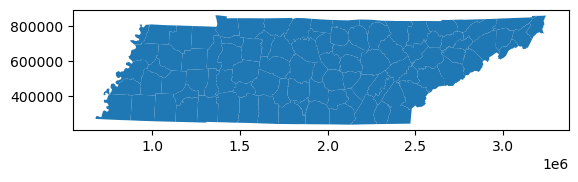

In [138]:
# importing tn counties shape
tn_counties = gpd.read_file('../data/county/tncounty.shp')
tn_counties.plot();

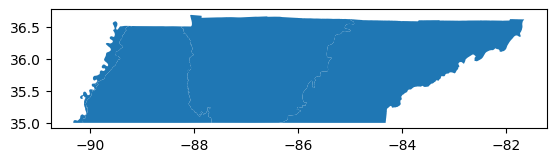

In [133]:
# importing BCR shape
tn_bcr = gpd.read_file('../data/bcr_terrestrial_shape/BCR_Terrestrial/BCR_Terrestrial_master.shp')
tn_bcr = tn_bcr.loc[(tn_bcr.BCR.isin([24, 27, 26, 28]))&(tn_bcr.PROVINCE_S == 'TENNESSE')]
tn_bcr.columns = ['object_id', 'bcr_code', 'bcr_name', 'province_s', 'country', 'region', 'water', 'area', 'perimeter', 'shape_len', 'shape_area', 'geometry']
tn_bcr = tn_bcr[['bcr_code', 'bcr_name', 'geometry']]
tn_bcr.plot();

In [134]:
# reading in USFWS codes
usfws_codes = pd.read_csv('../data/eBird_2007_to_2016_TN/USFWSCodes.txt', sep='\t')

# cleaning usfws codes df
usfws_codes = usfws_codes.reset_index()
usfws_codes['usfws_name'] = np.where(usfws_codes['USFWS NAME'].isnull(), usfws_codes['USFWS CODE'], usfws_codes['USFWS NAME'])
usfws_codes = usfws_codes[['index','usfws_name']]
usfws_codes.columns = ['usfws_code', 'usfws_name']
usfws_codes

,usfws_code,usfws_name
0,USFWS_1,FEATHERSTONE NATIONAL WILDLIFE REFUGE
1,USFWS_2,ARCHIE CARR NATIONAL WILDLIFE REFUGE
2,USFWS_3,BALD KNOB NATIONAL WILDLIFE REFUGE
3,USFWS_4,GREEN CAY NATIONAL WILDLIFE REFUGE
4,USFWS_5,SEAL BEACH NATIONAL WILDLIFE REFUGE
...,...,...
828,USFWS_829,SUSQUEHANNA NATIONAL WILDLIFE REFUGE
829,USFWS_830,TULE LAKE NATIONAL WILDLIFE REFUGE
830,USFWS_831,MISSISSIPPI SANDHILL CRANE NATIONAL WILDLIFE R...
831,USFWS_832,HANSON COUNTY WATERFOWL PRODUCTION AREA


### Adding columns for grouping

In [6]:
# creating seasons column: spring migration, fall migration, and offseason

# creating month column
birds['observation_month'] = [x[5:7] for x in birds.observation_date]
birds = birds.astype({'observation_month':int})

# spring: March to May
# fall: Sept to Oct

# # categorizing season based on date
for index, row in birds.iterrows():
    if (row['observation_month'] <= 5)&(row['observation_month'] >= 3):
        birds.loc[index, 'season'] = 'spring migration'
    elif (row['observation_month'] <= 10)&(row['observation_month'] >= 9):
        birds.loc[index, 'season'] = 'fall migration'
    else:
        birds.loc[index, 'season'] = 'offseason'

In [107]:
birds_by_season = birds.groupby('season').count()[['global_unique_identifier']]
birds_by_season.columns = ['count']
birds_by_season = birds_by_season.reset_index()
birds_by_season

,season,count
0,fall migration,419934
1,offseason,1302398
2,spring migration,1091063


In [14]:
# subset of fall & spring migration
fall_birds = birds.loc[birds.season == 'fall migration']
spring_birds = birds.loc[birds.season == 'spring migration']

## IBA

In [188]:
# creating subset of birds sighted within IBAs
iba_birds = birds.loc[~birds.iba_code.isna()]
iba_birds['iba_code'] = [x[6:10] for x in iba_birds.iba_code]
iba_birds = iba_birds.astype({'iba_code':int})
iba_birds = pd.merge(iba_birds, iba_names, on='iba_code', how='left')
iba_birds = iba_birds[['global_unique_identifier', 'observation_date', 'category', 'common_name', 'scientific_name', 'state', 'county', 'iba_code', 'lat', 'long', 'observer_id', 'trip_comments', 'observation_year', 'iba_name']]
iba_birds.head(3)

C:\Users\danil\AppData\Local\Temp\ipykernel_9880\2867449639.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iba_birds['iba_code'] = [x[6:10] for x in iba_birds.iba_code]


,global_unique_identifier,observation_date,category,common_name,scientific_name,state,county,iba_code,lat,long,observer_id,trip_comments,observation_year,iba_name
0,URN:CornellLabOfOrnithology:EBIRD:OBS178183365,2007-01-20,species,American Crow,Corvus brachyrhynchos,Tennessee,Blount,2865,35.604167,-83.784691,obsr58986,NaN,2007,Southern Blue Ridge
1,URN:CornellLabOfOrnithology:EBIRD:OBS178183148,2007-01-06,species,American Crow,Corvus brachyrhynchos,Tennessee,Blount,2865,35.604167,-83.784691,obsr58986,NaN,2007,Southern Blue Ridge
2,URN:CornellLabOfOrnithology:EBIRD:OBS178182618,2007-01-04,species,American Crow,Corvus brachyrhynchos,Tennessee,Blount,2865,35.604167,-83.784691,obsr58986,NaN,2007,Southern Blue Ridge


In [187]:
# creating separate list of sightings outside of IBA regions
birds_outside_iba = birds.loc[birds.iba_code.isna()]
birds_outside_iba.drop(columns=['usfws_code', 'iba_code'])
birds_outside_iba['within_iba'] = False
birds_outside_iba = birds_outside_iba[['global_unique_identifier', 'observation_date', 'category', 'common_name', 'scientific_name', 'state', 'county', 'lat', 'long', 'observer_id', 'trip_comments', 'observation_year', 'within_iba']]

birds_outside_iba.head()

C:\Users\danil\AppData\Local\Temp\ipykernel_9880\1970046191.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  birds_outside_iba['within_iba'] = False


,global_unique_identifier,observation_date,category,common_name,scientific_name,state,county,lat,long,observer_id,trip_comments,observation_year,within_iba
0,URN:CornellLabOfOrnithology:EBIRD:OBS36173336,2007-01-18,species,American Crow,Corvus brachyrhynchos,Tennessee,Anderson,36.116386,-84.110001,obsr104960,NaN,2007,False
1,URN:CornellLabOfOrnithology:EBIRD:OBS269070598,2007-01-16,species,American Crow,Corvus brachyrhynchos,Tennessee,Anderson,36.116386,-84.110001,obsr242764,NaN,2007,False
2,URN:CornellLabOfOrnithology:EBIRD:OBS36173326,2007-01-18,species,American Kestrel,Falco sparverius,Tennessee,Anderson,36.116386,-84.110001,obsr104960,NaN,2007,False
3,URN:CornellLabOfOrnithology:EBIRD:OBS36173330,2007-01-18,species,Bufflehead,Bucephala albeola,Tennessee,Anderson,36.116386,-84.110001,obsr104960,NaN,2007,False
4,URN:CornellLabOfOrnithology:EBIRD:OBS269070604,2007-01-16,species,Bufflehead,Bucephala albeola,Tennessee,Anderson,36.116386,-84.110001,obsr242764,NaN,2007,False


## USFWS

In [184]:
# creating subset of birds sighted within usfws polygon:
birds_usfws = birds.loc[~birds.usfws_code.isna()]

# joining birds_usfws with usfws codes
birds_usfws = pd.merge(birds_usfws, usfws_codes, on='usfws_code', how='left')

birds_usfws.head(3)

,global_unique_identifier,observation_date,category,common_name,scientific_name,state,county,iba_code,bcr_code,usfws_code,lat,long,observer_id,trip_comments,observation_year,usfws_name
0,URN:CornellLabOfOrnithology:EBIRD:OBS36528641,2007-01-29,species,American Black Duck,Anas rubripes,Tennessee,Decatur,US-TN_2874,24,USFWS_723,35.688577,-88.031288,obsr56053,"Mostly fair, wind L-M, -2 to -1C",2007,TENNESSEE NATIONAL WILDLIFE REFUGE
1,URN:CornellLabOfOrnithology:EBIRD:OBS36528636,2007-01-29,species,American Crow,Corvus brachyrhynchos,Tennessee,Decatur,US-TN_2874,24,USFWS_723,35.688577,-88.031288,obsr56053,"Mostly fair, wind L-M, -2 to -1C",2007,TENNESSEE NATIONAL WILDLIFE REFUGE
2,URN:CornellLabOfOrnithology:EBIRD:OBS36528647,2007-01-29,species,American Robin,Turdus migratorius,Tennessee,Decatur,US-TN_2874,24,USFWS_723,35.688577,-88.031288,obsr56053,"Mostly fair, wind L-M, -2 to -1C",2007,TENNESSEE NATIONAL WILDLIFE REFUGE


In [16]:
# creating separate list of sightings outside of USFWS regions
birds_outside_usfws = birds.loc[birds.usfws_code.isna()]
birds_outside_usfws.drop(columns=['usfws_code', 'iba_code'])
birds_outside_usfws['within_park'] = False

birds_outside_usfws.head()

C:\Users\danil\AppData\Local\Temp\ipykernel_9880\1810162964.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  birds_outside_usfws['within_park'] = False


,global_unique_identifier,observation_date,tax_order,category,common_name,scientific_name,age_sex,country,state,county,...,bcr_code,usfws_code,lat,long,observer_id,trip_comments,observation_year,observation_month,season,within_park
0,URN:CornellLabOfOrnithology:EBIRD:OBS36173336,2007-01-18,21054,species,American Crow,Corvus brachyrhynchos,NaN,United States,Tennessee,Anderson,...,28,NaN,36.116386,-84.110001,obsr104960,NaN,2007,1,offseason,False
1,URN:CornellLabOfOrnithology:EBIRD:OBS269070598,2007-01-16,21054,species,American Crow,Corvus brachyrhynchos,NaN,United States,Tennessee,Anderson,...,28,NaN,36.116386,-84.110001,obsr242764,NaN,2007,1,offseason,False
2,URN:CornellLabOfOrnithology:EBIRD:OBS36173326,2007-01-18,11697,species,American Kestrel,Falco sparverius,NaN,United States,Tennessee,Anderson,...,28,NaN,36.116386,-84.110001,obsr104960,NaN,2007,1,offseason,False
3,URN:CornellLabOfOrnithology:EBIRD:OBS36173330,2007-01-18,689,species,Bufflehead,Bucephala albeola,NaN,United States,Tennessee,Anderson,...,28,NaN,36.116386,-84.110001,obsr104960,NaN,2007,1,offseason,False
4,URN:CornellLabOfOrnithology:EBIRD:OBS269070604,2007-01-16,689,species,Bufflehead,Bucephala albeola,NaN,United States,Tennessee,Anderson,...,28,NaN,36.116386,-84.110001,obsr242764,NaN,2007,1,offseason,False


## EDA

#### with IBA code

In [190]:
# creating subset called outside iba top 10, grouping by year & common name
outside_iba_top10 = birds_outside_iba.loc[birds_outside_iba.common_name.isin(['Northern Cardinal', 'American Crow', 'Carolina Chickadee', 'Blue Jay', 'Carolina Wren', 'Tufted Titmouse', 'Mourning Dove', 'American Robin', 'Red-bellied Woodpecker', 'Northern Mockingbird'])]
outside_iba_top10 = outside_iba_top10.groupby(['observation_year', 'common_name']).count()[['global_unique_identifier']].reset_index()
outside_iba_top10.columns = ['observation_year', 'common_name', 'count']

# adding total count per year as a column
total_birds = outside_iba_top10.groupby('observation_year').sum()[['count']]
total_birds = total_birds.reset_index()
total_birds.columns=['observation_year', 'total_count_by_year']
# merging back
outside_iba_top10 = pd.merge(outside_iba_top10, total_birds, on='observation_year', how='inner')

# adding perc column
outside_iba_top10['perc_total_sightings'] = round(outside_iba_top10['count']/outside_iba_top10.total_count_by_year*100,2)

outside_iba_top10

,observation_year,common_name,count,total_count_by_year,perc_total_sightings
0,2007,American Crow,1784,18343,9.73
1,2007,American Robin,1455,18343,7.93
2,2007,Blue Jay,2055,18343,11.20
3,2007,Carolina Chickadee,2031,18343,11.07
4,2007,Carolina Wren,2010,18343,10.96
...,...,...,...,...,...
95,2016,Mourning Dove,14434,151121,9.55
96,2016,Northern Cardinal,19624,151121,12.99
97,2016,Northern Mockingbird,11260,151121,7.45
98,2016,Red-bellied Woodpecker,12827,151121,8.49


In [191]:
# creating subset called outside iba next top 10, grouping by year & common name
outside_iba_next_top10 = birds_outside_iba.loc[birds_outside_iba.common_name.isin(['American Goldfinch', 'Downy Woodpecker', 'Eastern Towhee', 'European Starling', 'Eastern Bluebird', 'Song Sparrow', 'Canada Goose', 'Great Blue Heron', 'House Finch', 'White-breasted Nuthatch'])]
outside_iba_next_top10 = outside_iba_next_top10.groupby(['observation_year', 'common_name']).count()[['global_unique_identifier']].reset_index()
outside_iba_next_top10.columns = ['observation_year', 'common_name', 'count']

# adding total count per year as a column
total_birds = outside_iba_next_top10.groupby('observation_year').sum()[['count']]
total_birds = total_birds.reset_index()
total_birds.columns=['observation_year', 'total_count_by_year']
# merging back
outside_iba_next_top10 = pd.merge(outside_iba_next_top10, total_birds, on='observation_year', how='inner')

# adding perc column
outside_iba_next_top10['perc_total_sightings'] = round(outside_iba_next_top10['count']/outside_iba_next_top10.total_count_by_year*100,2)

outside_iba_next_top10

,observation_year,common_name,count,total_count_by_year,perc_total_sightings
0,2007,American Goldfinch,1726,11816,14.61
1,2007,Canada Goose,901,11816,7.63
2,2007,Downy Woodpecker,1314,11816,11.12
3,2007,Eastern Bluebird,1330,11816,11.26
4,2007,Eastern Towhee,1296,11816,10.97
...,...,...,...,...,...
95,2016,European Starling,10576,94689,11.17
96,2016,Great Blue Heron,8768,94689,9.26
97,2016,House Finch,8895,94689,9.39
98,2016,Song Sparrow,9817,94689,10.37


In [194]:
# creating subset called iba top 10, grouping by year & common name
iba_top10 = iba_birds.loc[iba_birds.common_name.isin(['Great Blue Heron', 'American Crow', 'Northern Cardinal', 'Downy Woodpecker', 'American Robin', 'Carolina Wren', 'Carolina Chickadee', 'Red-bellied Woodpecker', 'Blue Jay', 'Tufted Titmouse'])]
iba_top10 = iba_top10.groupby(['observation_year', 'common_name']).count()[['global_unique_identifier']].reset_index()
iba_top10.columns = ['observation_year', 'common_name', 'count']

# adding total count per year as a column
total_birds = iba_top10.groupby('observation_year').sum()[['count']]
total_birds = total_birds.reset_index()
total_birds.columns=['observation_year', 'total_count_by_year']
# merging back
iba_top10 = pd.merge(iba_top10, total_birds, on='observation_year', how='inner')

# adding perc column
iba_top10['perc_total_sightings'] = round(iba_top10['count']/iba_top10.total_count_by_year*100,2)

iba_top10

,observation_year,common_name,count,total_count_by_year,perc_total_sightings
0,2007,American Crow,246,2064,11.92
1,2007,American Robin,175,2064,8.48
2,2007,Blue Jay,167,2064,8.09
3,2007,Carolina Chickadee,250,2064,12.11
4,2007,Carolina Wren,239,2064,11.58
...,...,...,...,...,...
95,2016,Downy Woodpecker,1934,23668,8.17
96,2016,Great Blue Heron,2076,23668,8.77
97,2016,Northern Cardinal,2846,23668,12.02
98,2016,Red-bellied Woodpecker,2195,23668,9.27


In [195]:
# creating subset called iba next top 10 (11-20), grouping by year & common name
iba_next_top10 = iba_birds.loc[iba_birds.common_name.isin(['Pileated Woodpecker', 'Canada Goose', 'American Goldfinch', 'Mourning Dove', 'Eastern Towhee', 'Eastern Bluebird', 'White-breasted Nuthatch', 'Mallard', 'Indigo Bunting', 'Red-eyed Vireo'])]
iba_next_top10 = iba_next_top10.groupby(['observation_year', 'common_name']).count()[['global_unique_identifier']].reset_index()
iba_next_top10.columns = ['observation_year', 'common_name', 'count']

# adding total count per year as a column
total_birds = iba_next_top10.groupby('observation_year').sum()[['count']]
total_birds = total_birds.reset_index()
total_birds.columns=['observation_year', 'total_count_by_year']
# merging back
iba_next_top10 = pd.merge(iba_next_top10, total_birds, on='observation_year', how='inner')

# adding perc column
iba_next_top10['perc_total_sightings'] = round(iba_next_top10['count']/iba_next_top10.total_count_by_year*100,2)
iba_next_top10

,observation_year,common_name,count,total_count_by_year,perc_total_sightings
0,2007,American Goldfinch,156,1432,10.89
1,2007,Canada Goose,169,1432,11.80
2,2007,Eastern Bluebird,161,1432,11.24
3,2007,Eastern Towhee,106,1432,7.40
4,2007,Indigo Bunting,131,1432,9.15
...,...,...,...,...,...
95,2016,Mallard,1432,14127,10.14
96,2016,Mourning Dove,1511,14127,10.70
97,2016,Pileated Woodpecker,1595,14127,11.29
98,2016,Red-eyed Vireo,1244,14127,8.81


#### with USFWS code

In [141]:
# creating subset called outside usfws top 10, grouping by year & common name
outside_usfws_top10 = birds_outside_usfws.loc[birds_outside_usfws.common_name.isin(['Northern Cardinal', 'American Crow', 'Carolina Chickadee', 'Blue Jay', 'Carolina Wren', 'Tufted Titmouse', 'Mourning Dove', 'American Robin', 'Red-bellied Woodpecker', 'Northern Mockingbird'])]
outside_usfws_top10 = outside_usfws_top10.groupby(['observation_year', 'common_name']).count()[['global_unique_identifier']].reset_index()
outside_usfws_top10.columns = ['observation_year', 'common_name', 'count']

# adding total count per year as a column
total_birds = outside_usfws_top10.groupby('observation_year').sum()[['count']]
total_birds = total_birds.reset_index()
total_birds.columns=['observation_year', 'total_count_by_year']
# merging back
outside_usfws_top10 = pd.merge(outside_usfws_top10, total_birds, on='observation_year', how='inner')

# adding perc column
outside_usfws_top10['perc_total_sightings'] = round(outside_usfws_top10['count']/outside_usfws_top10.total_count_by_year*100,2)

outside_usfws_top10
# .loc[outside_usfws_top10.common_name == 'Northern Mockingbird']

,observation_year,common_name,count,total_count_by_year,perc_total_sightings
0,2007,American Crow,1960,19900,9.85
1,2007,American Robin,1611,19900,8.10
2,2007,Blue Jay,2185,19900,10.98
3,2007,Carolina Chickadee,2228,19900,11.20
4,2007,Carolina Wren,2183,19900,10.97
...,...,...,...,...,...
95,2016,Mourning Dove,15580,168917,9.22
96,2016,Northern Cardinal,21883,168917,12.95
97,2016,Northern Mockingbird,11976,168917,7.09
98,2016,Red-bellied Woodpecker,14534,168917,8.60


In [144]:
# creating subset called outside usfws next top 10, grouping by year & common name
outside_usfws_next_top10 = birds_outside_usfws.loc[birds_outside_usfws.common_name.isin(['American Goldfinch', 'Downy Woodpecker', 'Eastern Towhee', 'European Starling', 'Eastern Bluebird', 'Song Sparrow', 'Canada Goose', 'Great Blue Heron', 'House Finch', 'White-breasted Nuthatch'])]
outside_usfws_next_top10 = outside_usfws_next_top10.groupby(['observation_year', 'common_name']).count()[['global_unique_identifier']].reset_index()
outside_usfws_next_top10.columns = ['observation_year', 'common_name', 'count']

# adding total count per year as a column
total_birds = outside_usfws_next_top10.groupby('observation_year').sum()[['count']]
total_birds = total_birds.reset_index()
total_birds.columns=['observation_year', 'total_count_by_year']
# merging back
outside_usfws_next_top10 = pd.merge(outside_usfws_next_top10, total_birds, on='observation_year', how='inner')

# adding perc column
outside_usfws_next_top10['perc_total_sightings'] = round(outside_usfws_next_top10['count']/outside_usfws_next_top10.total_count_by_year*100,2)

outside_usfws_next_top10

,observation_year,common_name,count,total_count_by_year,perc_total_sightings
0,2007,American Goldfinch,1861,12840,14.49
1,2007,Canada Goose,1041,12840,8.11
2,2007,Downy Woodpecker,1445,12840,11.25
3,2007,Eastern Bluebird,1468,12840,11.43
4,2007,Eastern Towhee,1386,12840,10.79
...,...,...,...,...,...
95,2016,European Starling,11251,104851,10.73
96,2016,Great Blue Heron,10164,104851,9.69
97,2016,House Finch,9166,104851,8.74
98,2016,Song Sparrow,10448,104851,9.96


In [95]:
# creating subset called usfws top 10, grouping by year & common name
usfws_top10 = birds_usfws.loc[birds_usfws.common_name.isin(['Great Blue Heron', 'American Crow', 'Northern Cardinal', 'Killdeer', 'Canada Goose', 'Carolina Wren', 'Mallard', 'Red-bellied Woodpecker', 'Bald Eagle', 'Tufted Titmouse'])]
usfws_top10 = usfws_top10.groupby(['observation_year', 'common_name']).count()[['global_unique_identifier']].reset_index()
usfws_top10.columns = ['observation_year', 'common_name', 'count']

# adding total count per year as a column
total_birds = usfws_top10.groupby('observation_year').sum()[['count']]
total_birds = total_birds.reset_index()
total_birds.columns=['observation_year', 'total_count_by_year']
# merging back
usfws_top10 = pd.merge(usfws_top10, total_birds, on='observation_year', how='inner')

# adding perc column
usfws_top10['perc_total_sightings'] = round(usfws_top10['count']/usfws_top10.total_count_by_year*100,2)

usfws_top10

,observation_year,common_name,count,total_count_by_year,perc_total_sightings
0,2007,American Crow,70,525,13.33
1,2007,Bald Eagle,16,525,3.05
2,2007,Canada Goose,29,525,5.52
3,2007,Carolina Wren,66,525,12.57
4,2007,Great Blue Heron,35,525,6.67
...,...,...,...,...,...
95,2016,Killdeer,395,5153,7.67
96,2016,Mallard,467,5153,9.06
97,2016,Northern Cardinal,587,5153,11.39
98,2016,Red-bellied Woodpecker,488,5153,9.47


In [96]:
# creating subset called usfws next top 10 (11-20), grouping by year & common name
usfws_next_top10 = birds_usfws.loc[birds_usfws.common_name.isin(['Turkey Vulture', 'Double-crested Cormorant', 'Blue Jay', 'Ring-billed Gull', 'Carolina Chickadee', 'Red-winged Blackbird', 'Eastern Bluebird', 'Pied-billed Grebe', 'Great Egret', 'Mourning Dove'])]
usfws_next_top10 = usfws_next_top10.groupby(['observation_year', 'common_name']).count()[['global_unique_identifier']].reset_index()
usfws_next_top10.columns = ['observation_year', 'common_name', 'count']

# adding total count per year as a column
total_birds = usfws_next_top10.groupby('observation_year').sum()[['count']]
total_birds = total_birds.reset_index()
total_birds.columns=['observation_year', 'total_count_by_year']
# merging back
usfws_next_top10 = pd.merge(usfws_next_top10, total_birds, on='observation_year', how='inner')

# adding perc column
usfws_next_top10['perc_total_sightings'] = round(usfws_next_top10['count']/usfws_next_top10.total_count_by_year*100,2)
usfws_next_top10

,observation_year,common_name,count,total_count_by_year,perc_total_sightings
0,2007,Blue Jay,37,253,14.62
1,2007,Carolina Chickadee,53,253,20.95
2,2007,Double-crested Cormorant,17,253,6.72
3,2007,Eastern Bluebird,23,253,9.09
4,2007,Great Egret,15,253,5.93
...,...,...,...,...,...
95,2016,Mourning Dove,365,4079,8.95
96,2016,Pied-billed Grebe,343,4079,8.41
97,2016,Red-winged Blackbird,406,4079,9.95
98,2016,Ring-billed Gull,418,4079,10.25


### attempting webscraping:

come back to later

In [ ]:
# come back to later!!
# download Selenium webdriver

In [ ]:
# # importing beautiful soup
# import requests
# from bs4 import BeautifulSoup as BS

In [ ]:
# # establishing connection
# URL = 'https://www.fws.gov/refuge/tennessee/map'
# response = requests.get(URL)

In [ ]:
# # checking connection
# response.status_code

In [ ]:
# soup = BS(response.text)

In [ ]:
# soup.findAll('path', attrs={'class':'leaflet-interactive'})